## Challenge

As mentioned in the Compass, we will be using data from international football (soccer :)) matches that took place between 1872 and 2019 (148 years). You can download the dataset from [**this link**](https://drive.google.com/file/d/1cCn5botBKzh1XZOvrxpcLle-Ua7Fh9BR/view?usp=sharing) and find more information about it on [**Kaggle**](https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017).

We need to make sure we understand all variables and information they store before we start working on the task. It's very important to understand the dataset to create meaningful visualizations.

> #### Instruction
> Use visualizations to answer following questions. Try different Python packages.

In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt

In [3]:
df_soccer = pd.read_csv('soccer_results.csv')

In [4]:
df_fifa = df_soccer.loc[df_soccer['tournament']=='FIFA World Cup']

## Task
Which teams scored the largest number of goals in FIFA World Cup?

In [5]:
df_fifa.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1304,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1305,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1306,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1307,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1308,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True


In [16]:
df_fifa_homeScore = df_fifa.groupby('home_team')['home_score'].sum().reset_index()
df_fifa_homeScore.head()

,home_team,home_score
0,Algeria,5
1,Angola,0
2,Argentina,114
3,Australia,7
4,Austria,30


In [14]:
df_fifa_awayScore = df_fifa.groupby('away_team')['away_score'].sum().reset_index()
df_fifa_awayScore.head()

,away_team,away_score
0,Algeria,8
1,Angola,1
2,Argentina,23
3,Australia,6
4,Austria,13


In [17]:
df_fifa_teams = pd.merge(df_fifa_homeScore, df_fifa_awayScore, left_on='home_team', right_on='away_team')

In [23]:
df_fifa_teams['total_score'] = df_fifa_teams['home_score'] + df_fifa_teams['away_score']

In [25]:
df_fifa_teams.head()

,home_team,home_score,away_team,away_score,total_score
0,Algeria,5,Algeria,8,13
1,Angola,0,Angola,1,1
2,Argentina,114,Argentina,23,137
3,Australia,7,Australia,6,13
4,Austria,30,Austria,13,43


In [35]:
df_fifa_teams = df_fifa_teams.rename(columns={'home_team': 'team'})

In [47]:
df_fifa_teams = df_fifa_teams[['team','total_score']]
df_fifa_teams = df_fifa_teams.sort_values(by='total_score', ascending = False)

In [58]:
df_fifa_top25 = df_fifa_teams.head(25)

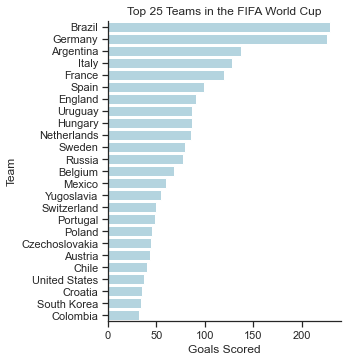

In [96]:
sns.set_theme(style='ticks')
fig1 = sns.catplot(data=df_fifa_top25, y='team', x='total_score', kind='bar', color='lightblue')
fig1.set_axis_labels("Goals Scored", "Team")
fig1.set(title = "Top 25 Teams in the FIFA World Cup")

## Task
What is the number of matches played in each tournament throughout history?

In [97]:
df_soccer.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [108]:
df_soccer_tournament = df_soccer.groupby('tournament')['tournament'].count().reset_index(name='count').sort_values(by='count', ascending=False)


In [111]:
df_soccer_tournament = df_soccer_tournament.loc[df_soccer_tournament['tournament'] != 'Friendly']

In [114]:
tournament_top10 = df_soccer_tournament.head(10)

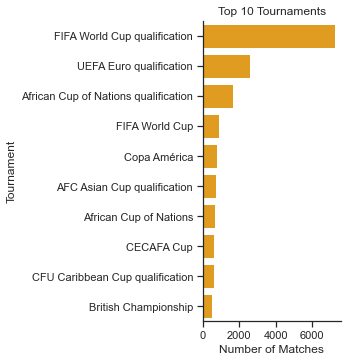

In [117]:
sns.set_theme(style='ticks')
fig2 = sns.catplot(data=tournament_top10, y='tournament', x='count', kind='bar', color='orange')
fig2.set_axis_labels("Number of Matches", "Tournament")
fig2.set(title = "Top 10 Tournaments")

## Task 
Show the trend in number of matches per year.

In [314]:
df_soccer['year'] = pd.to_datetime(df_soccer['date'])

In [315]:
df_soccer['year'] = df_soccer['year'].dt.year

In [316]:
soccer_years = df_soccer.groupby('year')['year'].count().reset_index(name='count')
soccer_years = soccer_years.iloc[0:-1]

In [317]:
soccer_years

,year,count
0,1872,1
1,1873,1
2,1874,1
3,1875,1
4,1876,2
...,...,...
143,2015,1003
144,2016,926
145,2017,958
146,2018,905


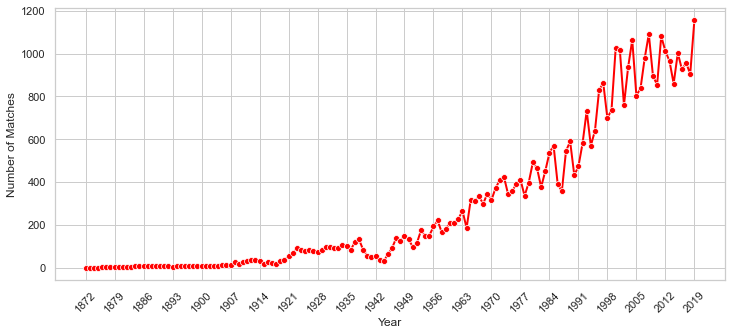

In [318]:
sns.set_style('whitegrid')
fig3 = sns.lineplot(data=soccer_years, y='count', x='year', color='red', marker='.', lw=2, ms='12')
plt.xticks(np.arange(1872, 2020, 7), rotation=45)
fig3.set_xlabel("Year")
fig3.set_ylabel("Number of Matches")
plt.gcf().set_size_inches(12,5)

## Task
Which teams are the most successful ones? (winning percentage)

In [319]:
df_soccer2 = df_soccer.copy()

In [284]:
df_soccer2['home_away_diff'] = df_soccer2['home_score'] - df_soccer2['away_score']

In [285]:
df_soccer2.loc[df_soccer2['home_away_diff'] == 0, 'winner']='tie'
df_soccer2.loc[df_soccer2['home_away_diff'] > 0, 'winner']=df_soccer2['home_team']
df_soccer2.loc[df_soccer2['home_away_diff'] < 0, 'winner']=df_soccer2['away_team']
df_soccer2 = df_soccer2.loc[df_soccer2['tournament'] != 'Friendly']

In [286]:
df_soccer2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,home_away_diff,winner
29,1884-01-26,Northern Ireland,Scotland,0,5,British Championship,Belfast,Republic of Ireland,False,1884,-5,Scotland
30,1884-02-09,Wales,Northern Ireland,6,0,British Championship,Wrexham,Wales,False,1884,6,Wales
31,1884-02-23,Northern Ireland,England,1,8,British Championship,Belfast,Republic of Ireland,False,1884,-7,England
32,1884-03-15,Scotland,England,1,0,British Championship,Glasgow,Scotland,False,1884,1,Scotland
33,1884-03-17,Wales,England,0,4,British Championship,Wrexham,Wales,False,1884,-4,England


In [287]:
df_team_wins = df_soccer2['winner'].value_counts().rename_axis('team').to_frame('number_of_wins').reset_index().query('team != "tie"')

In [288]:
df_homegames = df_soccer2['home_team'].value_counts().rename_axis('team').to_frame('home_games').reset_index()
df_homegames

,team,home_games
0,Argentina,382
1,Brazil,340
2,South Korea,314
3,England,303
4,Scotland,273
...,...,...
288,Cascadia,1
289,Saint Pierre and Miquelon,1
290,North Vietnam,1
291,Romani people,1


In [289]:
df_awaygames = df_soccer2['away_team'].value_counts().rename_axis('team').to_frame('away_games').reset_index()
df_awaygames

,team,away_games
0,Uruguay,330
1,England,293
2,Scotland,277
3,Northern Ireland,276
4,Thailand,268
...,...,...
286,Western Sahara,2
287,Romani people,2
288,Saarland,2
289,Saint Helena,2


In [290]:
df_games = df_homegames.merge(df_awaygames, on='team')

In [291]:
df_games['total_games'] = df_games['home_games'] + df_games['away_games']

In [292]:
df_games = df_games[['team','total_games']]

In [246]:
# to do above in one line
# df_games_played = df_soccer2['home_team'].value_counts().rename_axis('team').to_frame('home_games').add(df_soccer2['away_team'].value_counts().rename_axis('team').to_frame('home_games'), fill_value=0).reset_index()

In [293]:
df_win_perc = df_team_wins.merge(df_games, on='team')

In [294]:
df_win_perc['win_perc'] = df_win_perc['number_of_wins'] / df_win_perc['total_games']

In [295]:
df_win_perc2 = df_win_perc.loc[df_win_perc['total_games'] > 100]

In [296]:
df_win_perc2 = df_win_perc2.sort_values(by='win_perc', ascending=False)

In [303]:
top20_winPerc = df_win_perc2.head(20)

In [304]:
top20_winPerc

,team,number_of_wins,total_games,win_perc
7,Germany,253,380,0.665789
10,Spain,228,359,0.635097
12,Netherlands,206,335,0.614925
2,Brazil,331,549,0.602914
21,Iran,175,296,0.591216
0,England,347,596,0.582215
91,New Caledonia,80,138,0.579710
14,Russia,201,348,0.577586
71,Czech Republic,108,188,0.574468
13,France,203,354,0.573446


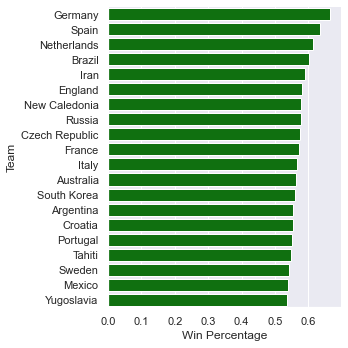

In [308]:
sns.set_theme(style='darkgrid')
fig4 = sns.catplot(data=top20_winPerc, y='team', x='win_perc', kind='bar', color='green')
fig4.set_axis_labels("Win Percentage", "Team")
fig2.set(title = "Top 20 Win Percentage")

## Task
Which teams are the least successful ones? (winning percentage)

In [309]:
bottom20_winPerc = df_win_perc2.tail(20)

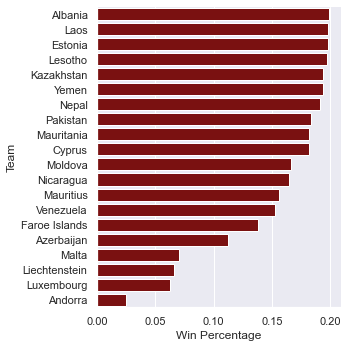

In [350]:
sns.set_theme(style='darkgrid')
fig4 = sns.catplot(data=bottom20_winPerc, y='team', x='win_perc', kind='bar', color='darkred')
fig4.set_axis_labels("Win Percentage", "Team")
fig2.set(title = "Bottom 20 Win Percentage")

## Task
Which months through the history had more matches? Is it June, July, or others? Does the number of matches change from month to month?

In [339]:
df_soccer2['month_name'] = pd.to_datetime(df_soccer2['date']).dt.strftime('%B')
df_soccer2['month'] = pd.to_datetime(df_soccer2['date']).dt.month

In [340]:
df_soccer2.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year,month,month_name
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872,11,November
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873,3,March
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874,3,March
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875,3,March
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876,3,March


In [341]:
df_soccer2.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
year           int64
month          int64
month_name    object
dtype: object

/var/folders/fm/m7sbfrtn37dcz2lvxhvj6q0m0000gn/T/ipykernel_9564/3599153686.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  fig5.set_xticklabels(months_sorted)


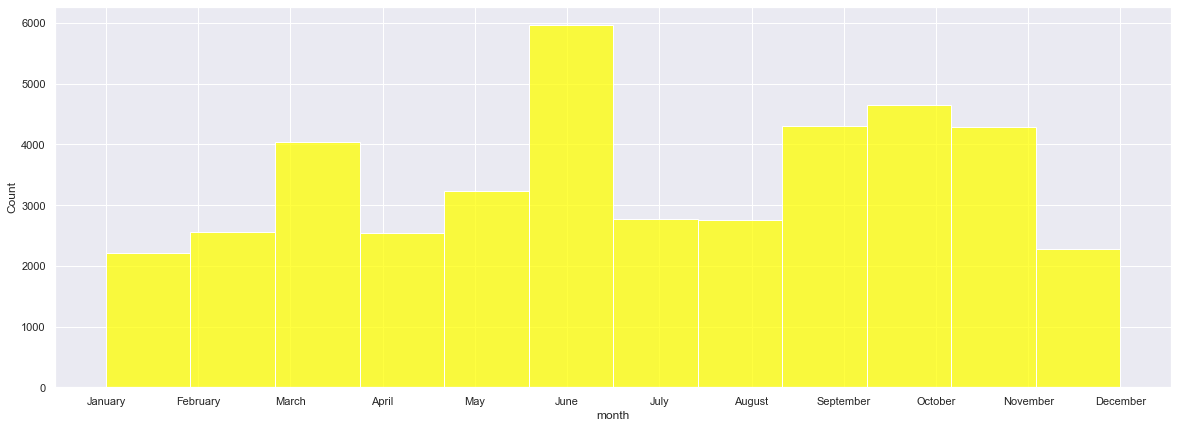

In [467]:
months = set(df_soccer2['month_name'])
sns.set_style('darkgrid')
fig5 = sns.histplot(df_soccer2['month'], kde=False, bins=12, color='yellow')
fig5.set_xticklabels(months_sorted)
fig5.set_xticks(np.arange(1,13,1))
# print(months)

from calendar import month_name
month_lookup = list(month_name)
months_sorted = sorted(months, key=month_lookup.index)

## Task
Which teams played against each other the most?

In [ ]:
# group by home and away teams and value counts? 

## Task
Apply your creativity to show some additional insights from the data.

## Task (Stretch)
Create these graphs in Tableau as well.